# Resource Selection
### This script explores Resource Selection through Resource Selection Probability Functions.<br>
*"When resources are used disproportionately to their availability, use is said to be selective."*<br>
- Manly et al., 2022

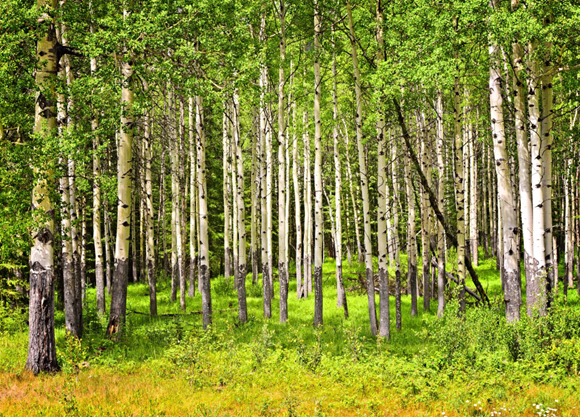 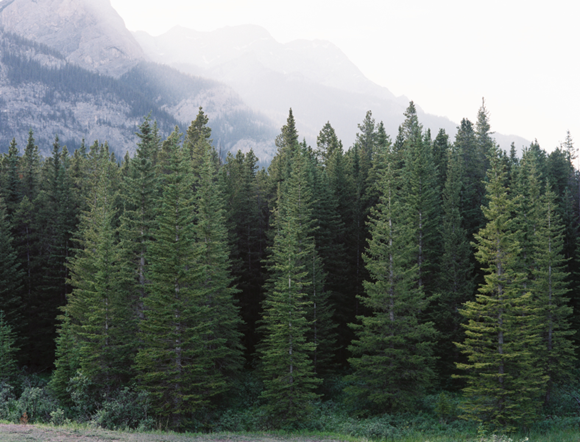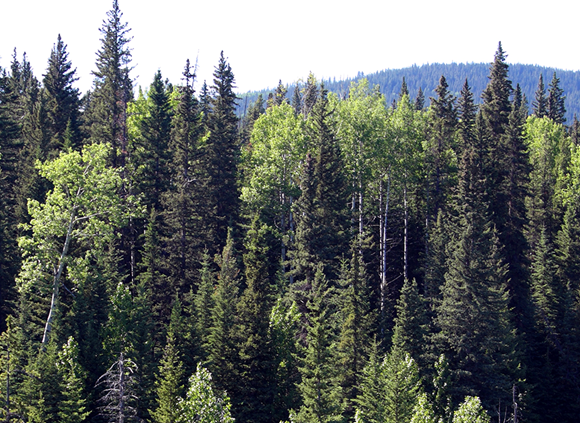

#### Definitions

When talking about habitat selection, where habitat is defined as a series of habitat types with x number of units in a given area, and selection is defined by the probability of use given an encounter with a habitat type unit, how is ‘habitat availability’ defined?
<ins>Available habitat</ins> is a resource that can be encountered by the bird.
The distribution of ‘available’ habitat is defined as: given the resource unit is an available unit, what is the probability that its resource type is x?
<!-- <p align="center"> -->
<p style="text-align: center;">P(Unit of type x | Unit is available)</p>
<!-- </p> -->

<ins>Use Distribution:</ins> if a resource unit is used, what is the probability that resource is type x. Defined as:
<!-- <p align="center"> -->
<p style="text-align: center;">P(Unit of type x | Unit is used)</p>
<!-- </p> -->

The Use distribution depends on 2 quantities:
1.	Probability of selection for resource type x
2.	Probability that resource unit is encountered

<ins>Probability of Selection</ins>, defined as:
<!-- <p align="center"> -->
<p style="text-align: center;">P(Unit is selected | Resource unit of type x is encountered)</p>
<!-- </p> -->

<ins>Probability of Use</ins>
<!-- <p align="center"> -->
<p style="text-align: center;">P(Single instance of use | Specific resource unit) </p>
<!-- </p> -->

How do you define Available Habitat?
-	Usually, the complete set of encountered units is unknown.
-	In practice, we make assumptions about the resource units that may be encountered and estimate the Available Distribution






In [1]:
# Load python packages and in-line R
%load_ext rpy2.ipython
import geopandas as gpd
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

ParentPath = r"C:\Users\ilebe\Documents\!Masters!\RUGR"

Unable to determine R home: [WinError 2] The system cannot find the file specified
c:\Users\ilebe\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
# Load R packages
%%R
# install.packages("ResourceSelection")

library(ResourceSelection)

R[write to console]: ResourceSelection 0.3-5 	 2019-07-22



In [12]:
# Load points and visualise dataframe
points = pd.read_csv(os.path.join(ParentPath, '0. Data', 'Raw', 'Wildtrax summary Mar 23', 'ABMI_RUGR_-_BU_LAB_PROJECT_basic_summary.csv'))
points.head(2)

,organization,project_name,location,recording_date,longitude,latitude,method,status,observer,species_code,species_common_name,species_class,individual_appearance_order,tag_start_s,vocalization,abundance,species_comments,is_verified,observer_id
0,ABMI,RUGR - BU LAB PROJECT,1022-NW,2015-04-21 00:00:00,-111.788589,53.676139,60s None,Transcribed,505,NONE,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505
1,ABMI,RUGR - BU LAB PROJECT,1022-NW,2015-04-22 02:00:00,-111.788589,53.676139,60s None,Transcribed,1057,NONE,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057


In [9]:
points.status.value_counts()

Transcribed    12944
New             4468
Bad Weather      183
In Progress       71
Malfunction       35
Name: status, dtype: int64

In [10]:
points.shape

(17701, 19)

In [11]:
points.species_code.unique()

array(['NONE', 'RUGR'], dtype=object)

In [13]:
# make a dataframe that has the location, species_code
desired_columns = ['location', 'species_code']
aggdict = {}
aggdict['species_code'] = lambda x: list(x)
points_summary = points[desired_columns].groupby(by = 'location', as_index=False).agg(aggdict)
points_summary['used_rate'] = points_summary['species_code'].apply(lambda x: x.count('RUGR'))
points_summary['visits_per_site'] = points_summary['species_code'].apply(lambda x: len(x))
points_summary['proportion_used'] = points_summary['used_rate'] / points_summary['visits_per_site']
# points_summary['Used_bin'] = points_summary
points_summary.loc[points_summary['used_rate'] >0, 'Used_bin' ] = 1
points_summary['Used_bin'].fillna(value = 0, inplace=True)

In [16]:
points_summary.head(2)

,location,species_code,used_rate,visits_per_site,proportion_used,Used_bin
0,1-NW,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...",5,41,0.121951,1.0
1,1022-NW,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...",0,48,0.000000,0.0


In [14]:
# Check for balance of the multi-visit sampling design.
points_summary.visits_per_site.value_counts()

49     88
48     72
50     70
47     20
52     13
51     13
56      8
54      7
53      4
57      4
46      4
22      4
58      3
26      3
44      3
45      3
42      3
97      2
18      2
24      2
43      2
23      2
55      2
41      2
100     2
98      2
60      2
64      1
39      1
1       1
29      1
70      1
19      1
33      1
25      1
28      1
17      1
111     1
110     1
77      1
27      1
8       1
36      1
63      1
34      1
62      1
Name: visits_per_site, dtype: int64

### Load covariates
For habitat selection, out general question is 

In [28]:
Beaudoin = pd.read_csv(os.path.join(ParentPath, '0. Data', 'ABMIpoints_Beaudoin.hardbuffers.150.565-sf-terra.csv'))

In [29]:
Beaudoin_veg = Beaudoin[['location', 'LandCover_Veg_v1.150m', 'LandCover_VegTreed_v1.150m']]


In [31]:
points_with_veg = pd.merge(points_summary, Beaudoin_veg, how='inner', on='location')

In [33]:
points_with_veg.head(2)

,location,species_code,used_rate,visits_per_site,proportion_used,Used_bin,LandCover_Veg_v1.150m,LandCover_VegTreed_v1.150m
0,1-NW,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...",5,41,0.121951,1.0,27.666666,8.000000
1,1086-NW,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...",0,49,0.000000,0.0,85.666668,50.666666


In [37]:
points_with_veg.to_csv(os.path.join(ParentPath, '0. Data', 'Processed', 'points_with_veg_covariates.csv'), index=False)

In [51]:
canopy = pd.read_csv(os.path.join(ParentPath, '0. Data', 'abmiPoints_canopy.csv'))
canopy.rename(columns={'location_name': 'location'}, inplace=True)
points_with_veg_and_canopy = pd.merge(points_with_veg, canopy[['location', 'canopy_height']], how='inner', on='location')

In [56]:
terrain = pd.read_csv(os.path.join(ParentPath, '0. Data', 'ABMI_points_terrain.csv'))
terrain.rename(columns={'location_name': 'location'}, inplace=True)
points_with_veg_canopy_terrain = pd.merge(points_with_veg_and_canopy, terrain[['location','elevation', 'slope', 'aspect', 'northness']], how='inner', on='location')
points_with_veg_canopy_terrain.head(1)

,location,species_code,used_rate,visits_per_site,proportion_used,Used_bin,LandCover_Veg_v1.150m,LandCover_VegTreed_v1.150m,canopy_height,elevation,slope,aspect,northness
0,1-NW,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...",5,41,0.121951,1.0,27.666666,8.0,5.801261,347,2.705455,225.663122,-0.698876


In [57]:
points_with_veg_canopy_terrain.to_csv(os.path.join(ParentPath, '0. Data', 'Processed', 'points_veg_canop_terrain.csv'), index=False)

In [ ]:
%%R
points_veg <- read.csv("C:/Users/ilebe/Documents/!Masters!/RUGR/0. Data/Processed/points_veg_canop_terrain.csv")
points_veg$sin.slope <- sin(pi * points_veg$slope / 180)
## Fit two RSPF models:
## global availability (m=0) and bootstrap (B=99)
m1 <- rspf(Used_bin ~ LandCover_Veg_v1.150m + LandCover_VegTreed_v1.150m +sin.slope + aspect + elevation, points_veg, m=0, B = 99)
m2 <- rspf(Used_bin ~ LandCover_Veg_v1.150m+ LandCover_VegTreed_v1.150m, points_veg, m=0, B = 99)
m3 <- rspf(Used_bin ~ sin.slope + aspect + elevation, points_veg, m=0, B = 99)

In [ ]:
%%R
library(ResourceSelection)
points_veg <- read.csv("../points_veg_canop_terrain.csv")
points_veg$sin.slope <- sin(pi * points_veg$slope / 180)
## Fit two RSPF models:
## global availability (m=0) and bootstrap (B=99)
m1 <- rspf(Used_bin ~ LandCover_Veg_v1.150m + LandCover_VegTreed_v1.150m +sin.slope + aspect + elevation, points_veg, m=0, B = 99)
m2 <- rspf(Used_bin ~ LandCover_Veg_v1.150m+ LandCover_VegTreed_v1.150m, points_veg, m=0, B = 99)
m3 <- rspf(Used_bin ~ sin.slope + aspect + elevation, points_veg, m=0, B = 99)

In [69]:
%%R
summary(m1)


Call:
rspf(formula = Used_bin ~ LandCover_Veg_v1.150m + LandCover_VegTreed_v1.150m + 
    sin.slope + aspect + elevation, data = points_veg, m = 0, B = 99)

Resource Selection Probability Function (Logistic RSPF) model
Non-matched Used-Available design
Maximum Likelihood estimates
with Nonparametric Bootstrap standard errors (B = 99)

Fitted probabilities:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005394 0.402916 0.878463 0.676975 0.972016 0.999822 

Coefficients (logit link):
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.9212195  4.4233937  -0.434    0.664    
LandCover_Veg_v1.150m       0.0073988  0.0588043   0.126    0.900    
LandCover_VegTreed_v1.150m -0.0509636  0.0339383  -1.502    0.133    
sin.slope                  -2.9150220  8.7808741  -0.332    0.740    
aspect                      0.0191236  0.0044989   4.251 2.13e-05 ***
elevation                   0.0046386  0.0006391   7.258 3.93e-13 ***
---
Signif. 

In [64]:
%%R
summary(m2)


Call:
rspf(formula = Used_bin ~ LandCover_Veg_v1.150m + LandCover_VegTreed_v1.150m, 
    data = points_veg, m = 0, B = 99)

Resource Selection Probability Function (Logistic RSPF) model
Non-matched Used-Available design
Maximum Likelihood estimates
with Nonparametric Bootstrap standard errors (B = 99)

Fitted probabilities:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4569  0.4668  0.5011  0.5473  0.5408  0.8231 

Coefficients (logit link):
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 0.0002401  3.2694056   0.000   0.9999    
LandCover_Veg_v1.150m       0.0153736  0.0077897   1.974   0.0484 *  
LandCover_VegTreed_v1.150m -0.0171042  0.0022309  -7.667 1.76e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Log-likelihood: -2067 
BIC =  4151 

Hosmer and Lemeshow goodness of fit (GOF) test:
X-squared = 74.46, df = 8, p-value 6.315e-13



In [70]:
%%R
summary(m3)


Call:
rspf(formula = Used_bin ~ sin.slope + aspect + elevation, data = points_veg, 
    m = 0, B = 99)

Resource Selection Probability Function (Logistic RSPF) model
Non-matched Used-Available design
Maximum Likelihood estimates
with Nonparametric Bootstrap standard errors (B = 99)

Fitted probabilities:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0171  0.7548  1.0000  0.7916  1.0000  1.0000 

Coefficients (logit link):
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -4.875e+00  4.521e-01  -10.782   <2e-16 ***
sin.slope   -3.483e+01  1.859e-01 -187.404   <2e-16 ***
aspect       3.471e+01  9.803e-01   35.412   <2e-16 ***
elevation    4.016e-03  4.495e-04    8.934   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Log-likelihood: -1846 
BIC =  3716 

Hosmer and Lemeshow goodness of fit (GOF) test:
X-squared = 44.69, df = 8, p-value 4.213e-07



In [71]:
%%R
CAIC(m1, m2, m3)

   df     CAIC
m1  6 3623.258
m2  3 4145.218
m3  4 3707.344


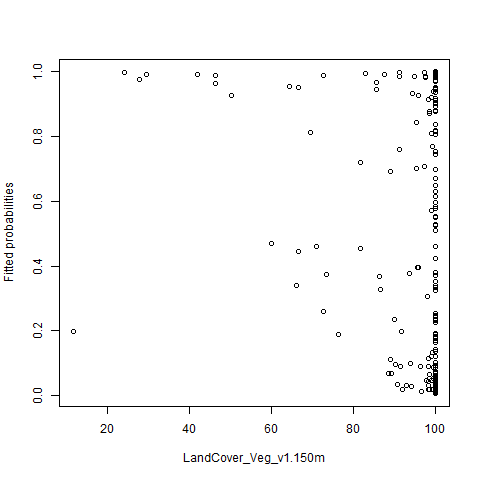

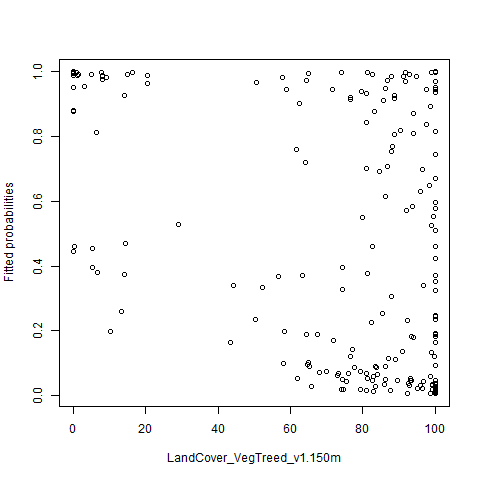

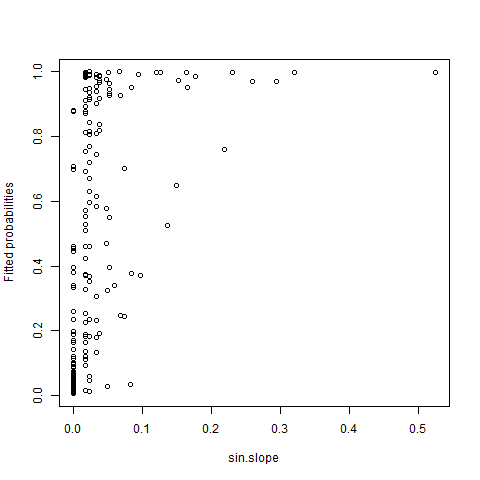

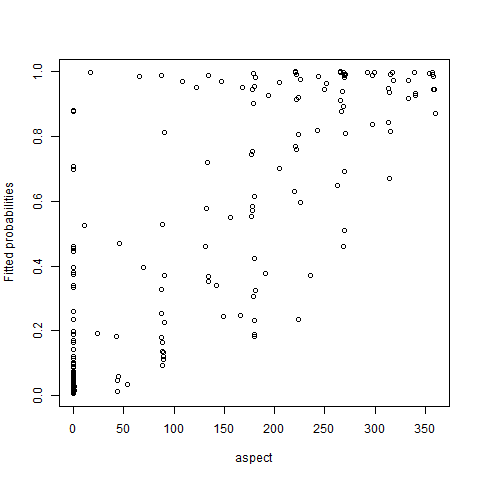

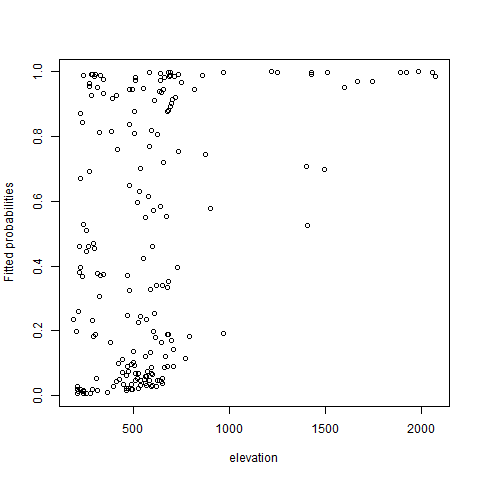

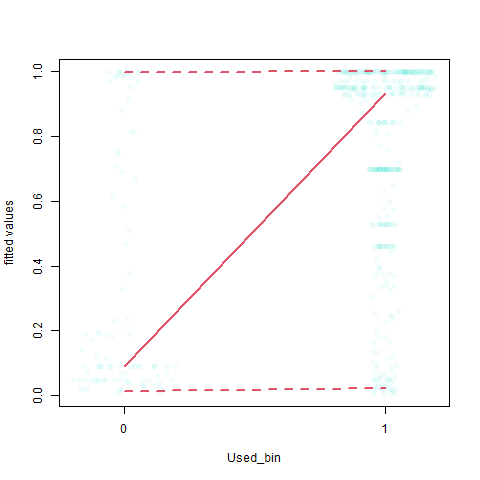

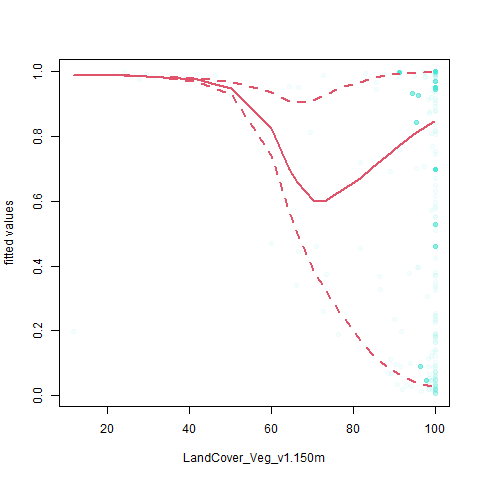

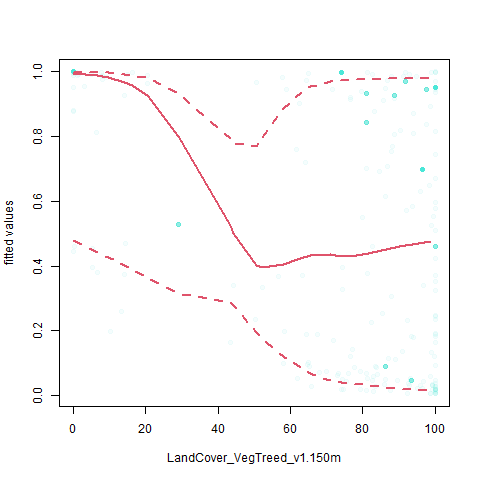

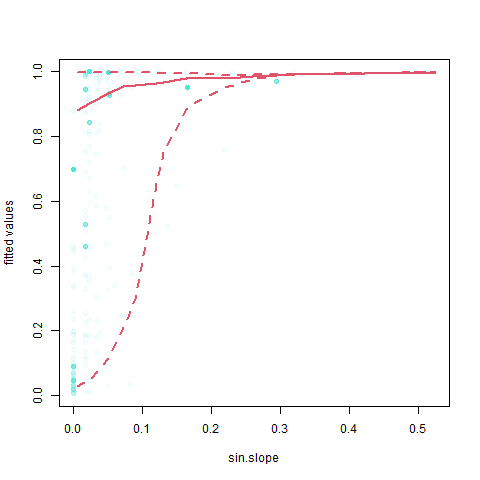

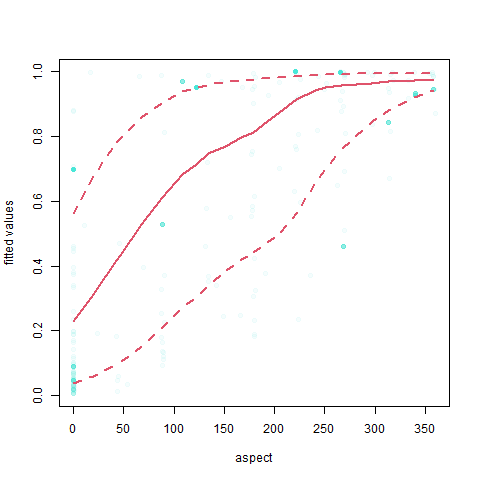

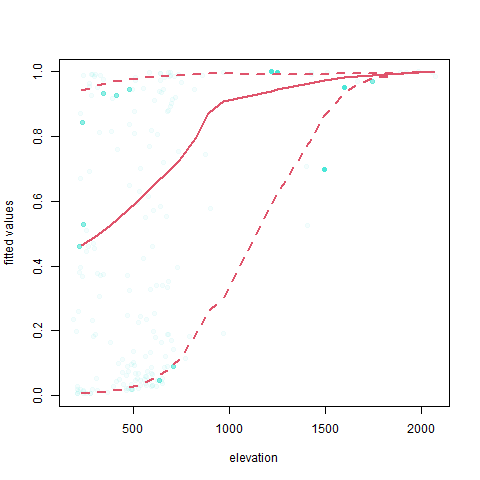

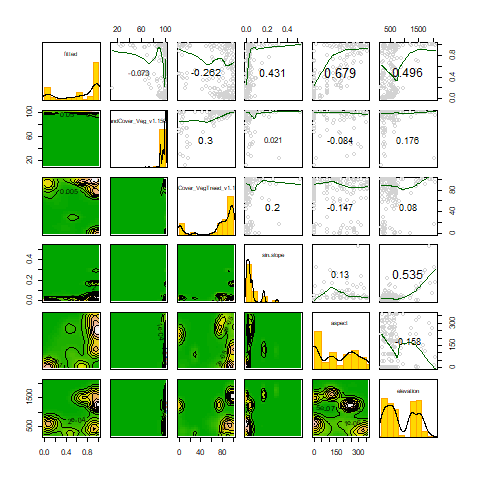

In [67]:
%%R
## Visualize the relationships
plot(m1)
mep(m1) # marginal effects similar to plot but with CIs
kdepairs(m1) # 2D kernel density estimates